# Extraction of LBP & HOG features from Digit MNIST dataset and classification using SVM classification.

## Import required packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature # This pacakge is used for LBP feature extraction
from sklearn import svm # This pacakge is used for svm classification
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import accuracy_score
%matplotlib inline
import cv2
import seaborn as sns # This pacakge is used for better visualization of data (e.g confusion matrix)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##  Mount the Google Drive to access the Digit MNIST Dataset

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Dataset preparation

In [0]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [4]:
cd /content/gdrive/My Drive/42028-DL-CNN-2020/Assignment-1/data

/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment-1/data


In [5]:
ls

t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte.gz  train-labels-idx1-ubyte.gz


In [0]:
X_train, y_train = load_mnist('/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment-1/data', kind='train')
X_test, y_test = load_mnist('/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment-1/data', kind='t10k')
# initialize the label names from MNIST digit 

labelNames = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

In [7]:
# The 28X28 images are flattened to feature vector of size 784
# There are 60,000 training examples in the training dataset
# There are 10,000 test sample in the testing dataset
print(np.shape(X_train))
print(np.shape(X_test))
#print(np.shape(y_train))

(60000, 784)
(10000, 784)


In [8]:
X_train=X_train.reshape(-1,28,28)
X_test=X_test.reshape(-1,28,28)

# print the size of the result reshaped train and test data splits

print("Train dataset after reshaping:{}".format(np.shape(X_train)))
print("Test dataset after reshaping :{}".format(np.shape(X_test)))

Train dataset after reshaping:(60000, 28, 28)
Test dataset after reshaping :(10000, 28, 28)


## Visualization of Dataset

9
7
3
6


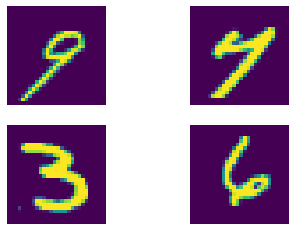

In [9]:
# view few images and print its corresponding label
img_index = 501
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.axis('off')
ax1.imshow(X_train[img_index])
print(labelNames[y_train[img_index]])

ax2 = fig.add_subplot(2,2,2)
ax2.axis('off')
img_index = 1001
ax2.imshow(X_train[img_index])
print(labelNames[y_train[img_index]])

ax2 = fig.add_subplot(2,2,3)
ax2.axis('off')
img_index = 20009
ax2.imshow(X_train[img_index])
print(labelNames[y_train[img_index]])

ax2 = fig.add_subplot(2,2,4)
ax2.axis('off')
img_index = 59000
ax2.imshow(X_train[img_index])
print(labelNames[y_train[img_index]])

## LBP for feature Extraction

### 3. Local Binary Patterns (LBP) class definition for LBP feature extraction

In [0]:
class LocalBinaryPatterns:
	def __init__(self, numPoints, radius):
		# store the number of points and radius
		self.numPoints = numPoints
		self.radius = radius
 
	def LBPfeatures(self, image, eps=1e-7):
		# compute the Local Binary Pattern representation
		# of the image, and then use the LBP representation
		# to build the histogram of patterns
		lbp = feature.local_binary_pattern(image, self.numPoints,
			self.radius, method="uniform")
    # Form the histogram
		(hist, _) = np.histogram(lbp.ravel(),
			bins=np.arange(0, self.numPoints + 3),
			range=(0, self.numPoints + 2))
 
		# normalize the histogram
		hist = hist.astype("float")
		hist /= (hist.sum() + eps)
 
		# return the histogram of Local Binary Patterns
		return hist

LBP feature extraction for the whole training dataset

In [0]:
# Create an object of LocalBinaryPatterns class and initial the parameters.
desc = LocalBinaryPatterns(12, 2)
data_train = []
labels_train = []

## WRITE YOUR CODE HERE (~ 3 lines)
# loop over the training images
for img_index in range(len(X_train)):
	# load the train image, and extract LBP features
	image = X_train[img_index]
	hist = desc.LBPfeatures(image)
## END YOUR CODE HERE 

	# extract the label from the image path, then update the
	# label and data lists
	labels_train.append(y_train[img_index])
	data_train.append(hist)

#print(np.shape(data_train))
#print(np.shape(labels_train))

### 4. Train SVM Classifier using the training dataset

In [12]:
# train a SVM clasifier on the training data
# Initialize the SVM model
# Use rbf Kernel, c = 100 and randon_state=42
from sklearn import svm
model = svm.SVC(kernel='rbf',C=300,random_state=42,gamma=5) 
# Start training the SVM classifier 
model.fit(data_train,labels_train)

print(np.shape(data_train))
print(np.shape(labels_train))

(60000, 14)
(60000,)


In [13]:
# Check the training accuray
print("Train set Accuracy: {:.2f}".format(model.score(data_train,labels_train)))

Train set Accuracy: 0.61


### 5. Evaluation of trained model on test dataset

In [0]:
predictions=[]
predict_label=[]
# Exract LBP features for each test sample and classify it with the trained SVM classifier

for im_index in range(len(X_test)):
  imag = X_test[im_index]
  
  # Extract LBP feature
  histo = desc.LBPfeatures(imag)
  prediction = model.predict(histo.reshape(1,-1))
  
  # Store the classfication result
  predictions.append(prediction)
  predict_label.append(y_test[im_index])

In [15]:
print(np.shape(predictions))
print(np.shape(y_test))

(10000, 1)
(10000,)


In [16]:
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy on test dataset:",accuracy)

Accuracy on test dataset: 0.6083


### Visualization of results

[[ 827    0   22    5    3   31   39    4   10   39]
 [   0 1091    0    1    4    1    7   30    0    1]
 [  29    2  264  136  128  133   54   89  128   69]
 [   4    1   87  612  112  114    9   16   28   27]
 [   0    2   47   96  555   70    6  125   21   60]
 [  32    1   88  162   81  324   48   78   12   66]
 [  89    5   41   20   10   48  488   39   39  179]
 [   6   41   23   38  138   39    8  728    3    4]
 [  14    0   41   52   16   11   46    2  754   38]
 [  53    3   55   44   84   66  197   23   44  440]]


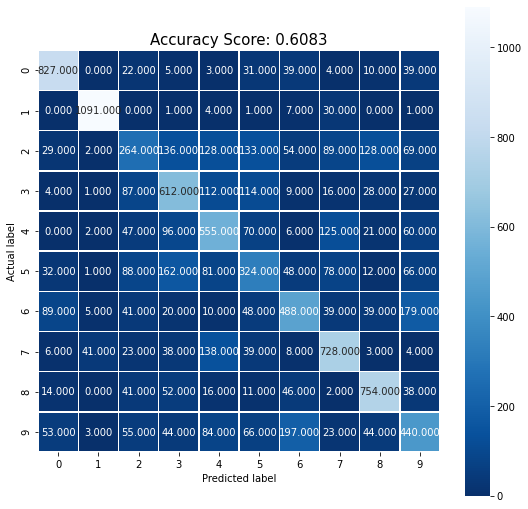

In [17]:
# plot the confusion matrix
cm  = metrics.confusion_matrix(y_test, predictions)
print(cm)

# Plot confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [0]:
# Display some classification result on test samples
images = []
 
# randomly select a few testing
for i in np.random.choice(np.arange(0, len(y_test)), size=(16,)):
  # classify the clothing
  histog = desc.LBPfeatures(X_test[i])
  prediction = model.predict(histog.reshape(1, -1))
  label = labelNames[prediction[0]]
  orig_label=labelNames[y_test[i]]
  image = X_test[i]
  color = (0, 255, 0)
  image = cv2.merge([image] * 3)
  image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
  cv2.putText(image, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50, color, 2)
  images.append(image)

In [19]:
np.shape(images[1])

(96, 96, 3)

0


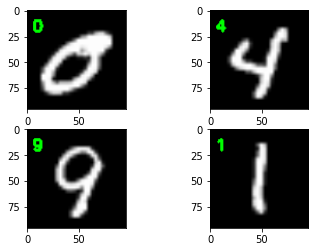

In [20]:
## Display the classification results
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(images[1])
print(orig_label[:])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(images[2])
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(images[3])
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(images[4])

## HOG for feature Extraction

### Histogram-of-Oriented Gradient (HOG) feature extraction

In [21]:
# initialize the data matrix and labels
print("Extracting features from training dataset...")
data_train = []
labels_train = []

# loop over the training images
for img_index in range(len(X_train)):
  # load the image, and extract HOG features it
  image = X_train[img_index]

  H = feature.hog(image, orientations=9, pixels_per_cell=(7,7), cells_per_block=(2,2),
                  transform_sqrt=True,block_norm="L2-Hys") 
 
  # update the data and labels
  data_train.append(H) 
  labels_train.append(y_train[img_index])
print(np.shape(data_train))
print(np.shape(labels_train))

Extracting features from training dataset...
(60000, 324)
(60000,)


In [22]:
img_index

59999

### Training Classifier using SVM classifier

In [23]:
model = svm.SVC(kernel='rbf',C=100, random_state=42) 
model.fit(data_train,labels_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [24]:
print("Train set Accuracy: {:.2f}".format(model.score(data_train,labels_train)))

Train set Accuracy: 1.00


### Evaluation of trained model on test dataset

In [25]:
# initialize the data matrix and labels
print("Extracting features from test dataset...")
predict_test = []
labels_test = []
data_test=[]
# loop over the training images
for img_ind in range(len(X_test)):
  # load the image, and extract HOG features
  img=X_test[img_ind]
  H = feature.hog(img, orientations=9, pixels_per_cell=(7, 7),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
  pred = model.predict(H.reshape(1, -1))[0]
  # update the data and labels
  predict_test.append(pred)
  data_test.append(H)
  
  labels_test.append(y_test[img_ind])
  
print(np.shape(predict_test))
print(np.shape(labels_test))

Extracting features from test dataset...
(10000,)
(10000,)


In [26]:
# Test set Accuracy
accuracy = metrics.accuracy_score(y_test, predict_test)
print("Accuracy on test dataset:",accuracy)

Accuracy on test dataset: 0.9803


[[ 971    2    0    1    0    0    4    0    1    1]
 [   0 1123    3    0    0    0    3    3    3    0]
 [   2    2 1016    2    1    0    1    4    4    0]
 [   0    1    3  981    0   10    0    2   11    2]
 [   0    0    0    0  961    0    3    1    4   13]
 [   0    0    1   11    0  874    3    0    2    1]
 [   2    3    1    0    0    3  948    0    1    0]
 [   0    1    9    0    5    0    0 1008    0    5]
 [   4    3    3    7    2    2    0    2  946    5]
 [   1    2    2    4    9    3    0    8    5  975]]


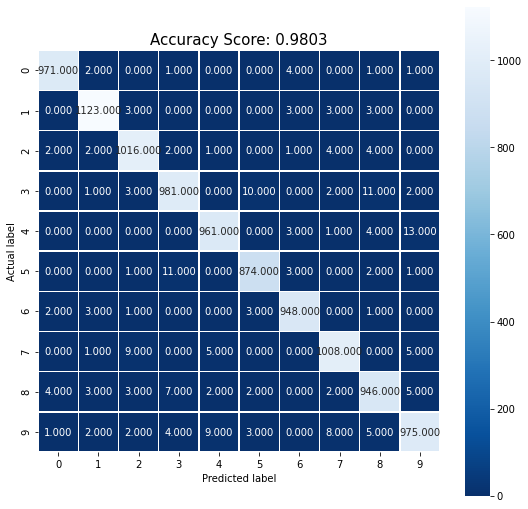

In [27]:
# plot the confusion matrix
cm  = metrics.confusion_matrix(y_test, predict_test)
print(cm)

# Plot confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

### Visualization of results

In [0]:
images = []
orig_labels=[]
# randomly select a few testing
for i in np.random.choice(np.arange(0, len(y_test)), size=(16,)):
  # classify the clothing
  test_img = (X_test[i])
  H1 = feature.hog(test_img, orientations=9, pixels_per_cell=(7, 7),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
  pred = model.predict(H1.reshape(1, -1))[0]
  #prediction = model.predict(test_img.reshape(1, -1))
  label = labelNames[pred]
  orig_labels.append(labelNames[y_test[i]])
  color = (0, 255, 0)
  test_img = cv2.merge([test_img] * 3)
  test_img = cv2.resize(test_img, (96, 96), interpolation=cv2.INTER_LINEAR)
  cv2.putText(test_img, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50, color, 2)
  images.append(test_img)

In [29]:
orig_labels[1]

'9'

9
3
3
0


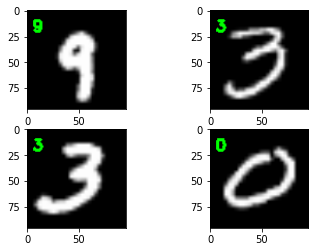

In [30]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(images[1])
print(orig_labels[1])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(images[5])
print(orig_labels[5])
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(images[3])
print(orig_labels[3])
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(images[11])
print(orig_labels[11])

## Raw data/images

In [0]:
X_train, y_train = load_mnist('/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment-1/data', kind='train')
X_test, y_test = load_mnist('/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment-1/data', kind='t10k')
# initialize the label names from MNIST digit

labelNames = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

In [32]:
# train a SVM clasifier on the training data
# Initialize the SVM model
from sklearn import svm
model = svm.SVC(kernel='rbf',C=100,random_state=42) 
# Start training the SVM classifier 
model.fit(X_train,y_train)

print(np.shape(X_train))
print(np.shape(y_train))

(60000, 784)
(60000,)


In [33]:
# Check the training accuray
print("Train set Accuracy: {:.2f}".format(model.score(X_train,y_train)))

Train set Accuracy: 1.00


In [0]:
predictions=[]
predict_label=[]

for im_index in range(len(X_test)):
  imag = X_test[im_index]
  
  # Perform classification
  prediction = model.predict(imag.reshape(1,-1))
  
  # Store the classfication result
  predictions.append(prediction)
  predict_label.append(y_test[im_index])

In [35]:
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy on test dataset:",accuracy)

Accuracy on test dataset: 0.9833


[[ 971    2    0    1    0    0    4    0    1    1]
 [   0 1123    3    0    0    0    3    3    3    0]
 [   2    2 1016    2    1    0    1    4    4    0]
 [   0    1    3  981    0   10    0    2   11    2]
 [   0    0    0    0  961    0    3    1    4   13]
 [   0    0    1   11    0  874    3    0    2    1]
 [   2    3    1    0    0    3  948    0    1    0]
 [   0    1    9    0    5    0    0 1008    0    5]
 [   4    3    3    7    2    2    0    2  946    5]
 [   1    2    2    4    9    3    0    8    5  975]]


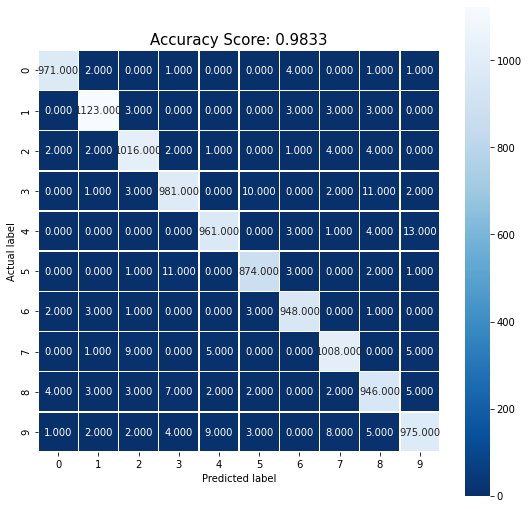

In [37]:
# plot the confusion matrix
cm  = metrics.confusion_matrix(y_test, predict_test)
print(cm)

# Plot confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);